Import

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind, levene
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

Refining transformations can involve exploring different transformation techniques and their parameters until the desired distribution properties, such as normality and homogeneity of variances, are achieved. Here are a few advanced methods to refine the transformations:

1. Box-Cox Transformation:
This transformation is defined as:
\frac{{Y^\lambda - 1}}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(Y) & \text{if } \lambda = 0
\end{array} \right. \]
The parameter 
�
λ is chosen to minimize the skewness of the transformed data.
It requires the input data to be strictly positive.
2. Yeo-Johnson Transformation:
This is an extension of the Box-Cox transformation and can be applied to data with both positive and negative values.
The transformation is defined as:
\left[ (1 + \lambda Y)^{(\lambda)} - 1 \right] / \lambda & \text{if } Y \geq 0 \text{ and } \lambda \neq 0 \\
\ln(1 + Y) & \text{if } Y \geq 0 \text{ and } \lambda = 0 \\
\left[ (|1 + \lambda (2 - Y)|)^{(2 - \lambda)} - 1 \right] / (2 - \lambda) & \text{if } Y < 0 \text{ and } \lambda \neq 2 \\
\ln(2 - Y) & \text{if } Y < 0 \text{ and } \lambda = 2
\end{array} \right. \]
3. Quantile Transformation:
This transformation maps the data to a standard normal distribution.
It can handle outliers and can map them closer to the mean of the transformed data.
4. Fine-tuning Transformation Parameters:
Manually adjust the parameters of the transformation methods, such as the power in the Box-Cox transformation, to achieve the desired properties in the transformed data.
Implementation:
Explore and apply the advanced transformation methods like Box-Cox, Yeo-Johnson, or Quantile Transformation to the features.
Fine-tune the parameters of the transformations to achieve more symmetric and normal distributions.
Would you like to try any of these advanced transformation methods or fine-tune the existing transformations?

Great! For further analysis, you could consider the following steps based on the transformed datasets:

### 1. **Multicollinearity Check:**
   - Assess multicollinearity among the newly created binary features after one-hot encoding.
   - Consider removing highly correlated features or using dimensionality reduction techniques like PCA.

### 2. **Feature Importance Analysis:**
   - Evaluate the importance of each feature using tree-based models like Random Forest or gradient boosting algorithms.
   - Use the feature importance scores to select the most relevant features for model training.

### 3. **Model Training and Evaluation:**
   - Train models using the transformed datasets and evaluate their performance using appropriate metrics, such as accuracy, precision, recall, F1 score, or AUC-ROC for classification tasks.
   - Perform cross-validation to assess the model's generalization capability on unseen data.

### 4. **Hyperparameter Tuning:**
   - Tune the hyperparameters of the chosen models to optimize their performance on the given task.
   - Use techniques like Grid Search or Randomized Search for hyperparameter optimization.

### 5. **Model Comparison:**
   - Compare the performance of different models on the test dataset and choose the best-performing model based on the evaluation metrics.

### 6. **Residual Analysis:**
   - For regression models, analyze the residuals to check the model's assumptions and identify any patterns or anomalies in the model’s errors.

### Next Steps:
Would you like to start with any specific analysis from the above, or do you have a different analysis or task in mind that you would like to proceed with?

Data

In [16]:
original_data = pd.read_csv("./data/horse.csv")
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

### Exploratory Data Analysis (EDA)

>   * Explore distributions of numerical features.
>   * Explore distributions of categorical features.
>   * Explore relationships between features and the target variable.

### Statistical Analysis

>   * Perform hypothesis tests to understand significance.
>   * Analyze variance to understand feature importance.

### Feature Engineering Suggestions

>   * Based on EDA and Statistical Analysis, suggest potential new features or transformations.

In [17]:
# Identify categorical features in the datasets
categorical_features_train = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_features_horse = original_data.select_dtypes(include=['object']).columns.tolist()
categorical_features_test = test_data.select_dtypes(include=['object']).columns.tolist()
categorical_features_train.remove('outcome')
categorical_features_horse.remove('outcome')
categorical_features = categorical_features_train

def calculate_category_frequencies(data, categorical_features):
    category_frequencies = {}
    for feature in categorical_features:
        frequencies = data[feature].value_counts(normalize=True).to_dict()
        category_frequencies[feature] = frequencies
    return category_frequencies

# Calculate category frequencies for each categorical feature in train_data, horse_data, and test_data
train_category_frequencies = calculate_category_frequencies(train_data, categorical_features)
horse_category_frequencies = calculate_category_frequencies(original_data, categorical_features)
test_category_frequencies = calculate_category_frequencies(test_data, categorical_features)

# Compare the category frequencies across the datasets and identify discrepancies or rare categories
rare_categories = {
    "Feature": [],
    "Category": [],
    "Train Proportion": [],
    "Horse Proportion": [],
    "Test Proportion": []
}
for feature in categorical_features:
    train_categories = set(train_category_frequencies.get(feature, {}).keys())
    horse_categories = set(horse_category_frequencies.get(feature, {}).keys())
    test_categories = set(test_category_frequencies.get(feature, {}).keys())
    
    # Get the union of all categories present in any of the datasets for the given feature
    all_categories = train_categories.union(horse_categories).union(test_categories)
    
    for category in all_categories:
        # Append the category and its proportion in each dataset to the dictionary
        rare_categories["Feature"].append(feature)
        rare_categories["Category"].append(category)
        rare_categories["Train Proportion"].append(train_category_frequencies.get(feature, {}).get(category, 0))
        rare_categories["Horse Proportion"].append(horse_category_frequencies.get(feature, {}).get(category, 0))
        rare_categories["Test Proportion"].append(test_category_frequencies.get(feature, {}).get(category, 0))

# Convert the results to a DataFrame and display
rare_categories_df = pd.DataFrame(rare_categories)
rare_categories_df

,Feature,Category,Train Proportion,Horse Proportion,Test Proportion
0,surgery,yes,0.718219,0.602007,0.714806
1,surgery,no,0.281781,0.397993,0.285194
2,age,adult,0.939271,0.919732,0.949029
3,age,young,0.060729,0.080268,0.050971
4,temp_of_extremities,warm,0.042642,0.123457,0.041825
...,...,...,...,...,...
56,abdomo_appearance,cloudy,0.302443,0.350746,0.291299
57,surgical_lesion,yes,0.752227,0.635452,0.751214
58,surgical_lesion,no,0.247773,0.364548,0.248786
59,cp_data,yes,0.540891,0.331104,0.533981


In [23]:
discrete_features = []
continuous_features = []

# Classify numerical features as discrete or continuous
for col in train_data.select_dtypes(include=['int64', 'float64']).columns:
    if col == 'id':  # 'id' is not a feature
        continue
    
    # Consider integer type features with less than 15 unique values as discrete
    if train_data[col].dtype == 'int64' and len(train_data[col].unique()) < 15:
        discrete_features.append(col)
    # Consider float type features and integer type features with 15 or more unique values as continuous
    else:
        continuous_features.append(col)

# Display the classified features
print(f"categorical_features: \n{categorical_features}\ndiscrete_features: \n{discrete_features}\ncontinuous_features: \n{continuous_features}")

categorical_features: 
['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']
discrete_features: 
['lesion_2', 'lesion_3']
continuous_features: 
['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1']


In [24]:
# Correct the classification of features
discrete_features.append('lesion_1')
continuous_features.remove('lesion_1')

categorical_features.append('hospital_number')
continuous_features.remove('hospital_number')

# Display the classified features
print(f"categorical_features: \n{categorical_features}\ndiscrete_features: \n{discrete_features}\ncontinuous_features: \n{continuous_features}")

categorical_features: 
['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data', 'hospital_number']
discrete_features: 
['lesion_2', 'lesion_3', 'lesion_1']
continuous_features: 
['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']


In [25]:
for c in categorical_features:
    print(f"{c} : {train_data[c].nunique()}")

surgery : 2
age : 2
temp_of_extremities : 4
peripheral_pulse : 4
mucous_membrane : 6
capillary_refill_time : 3
pain : 6
peristalsis : 5
abdominal_distention : 4
nasogastric_tube : 3
nasogastric_reflux : 4
rectal_exam_feces : 5
abdomen : 5
abdomo_appearance : 3
surgical_lesion : 2
cp_data : 2
hospital_number : 255


removing hospital_number from count plot due to high unique values

In [26]:
rev_categorical_features = categorical_features[:-1]

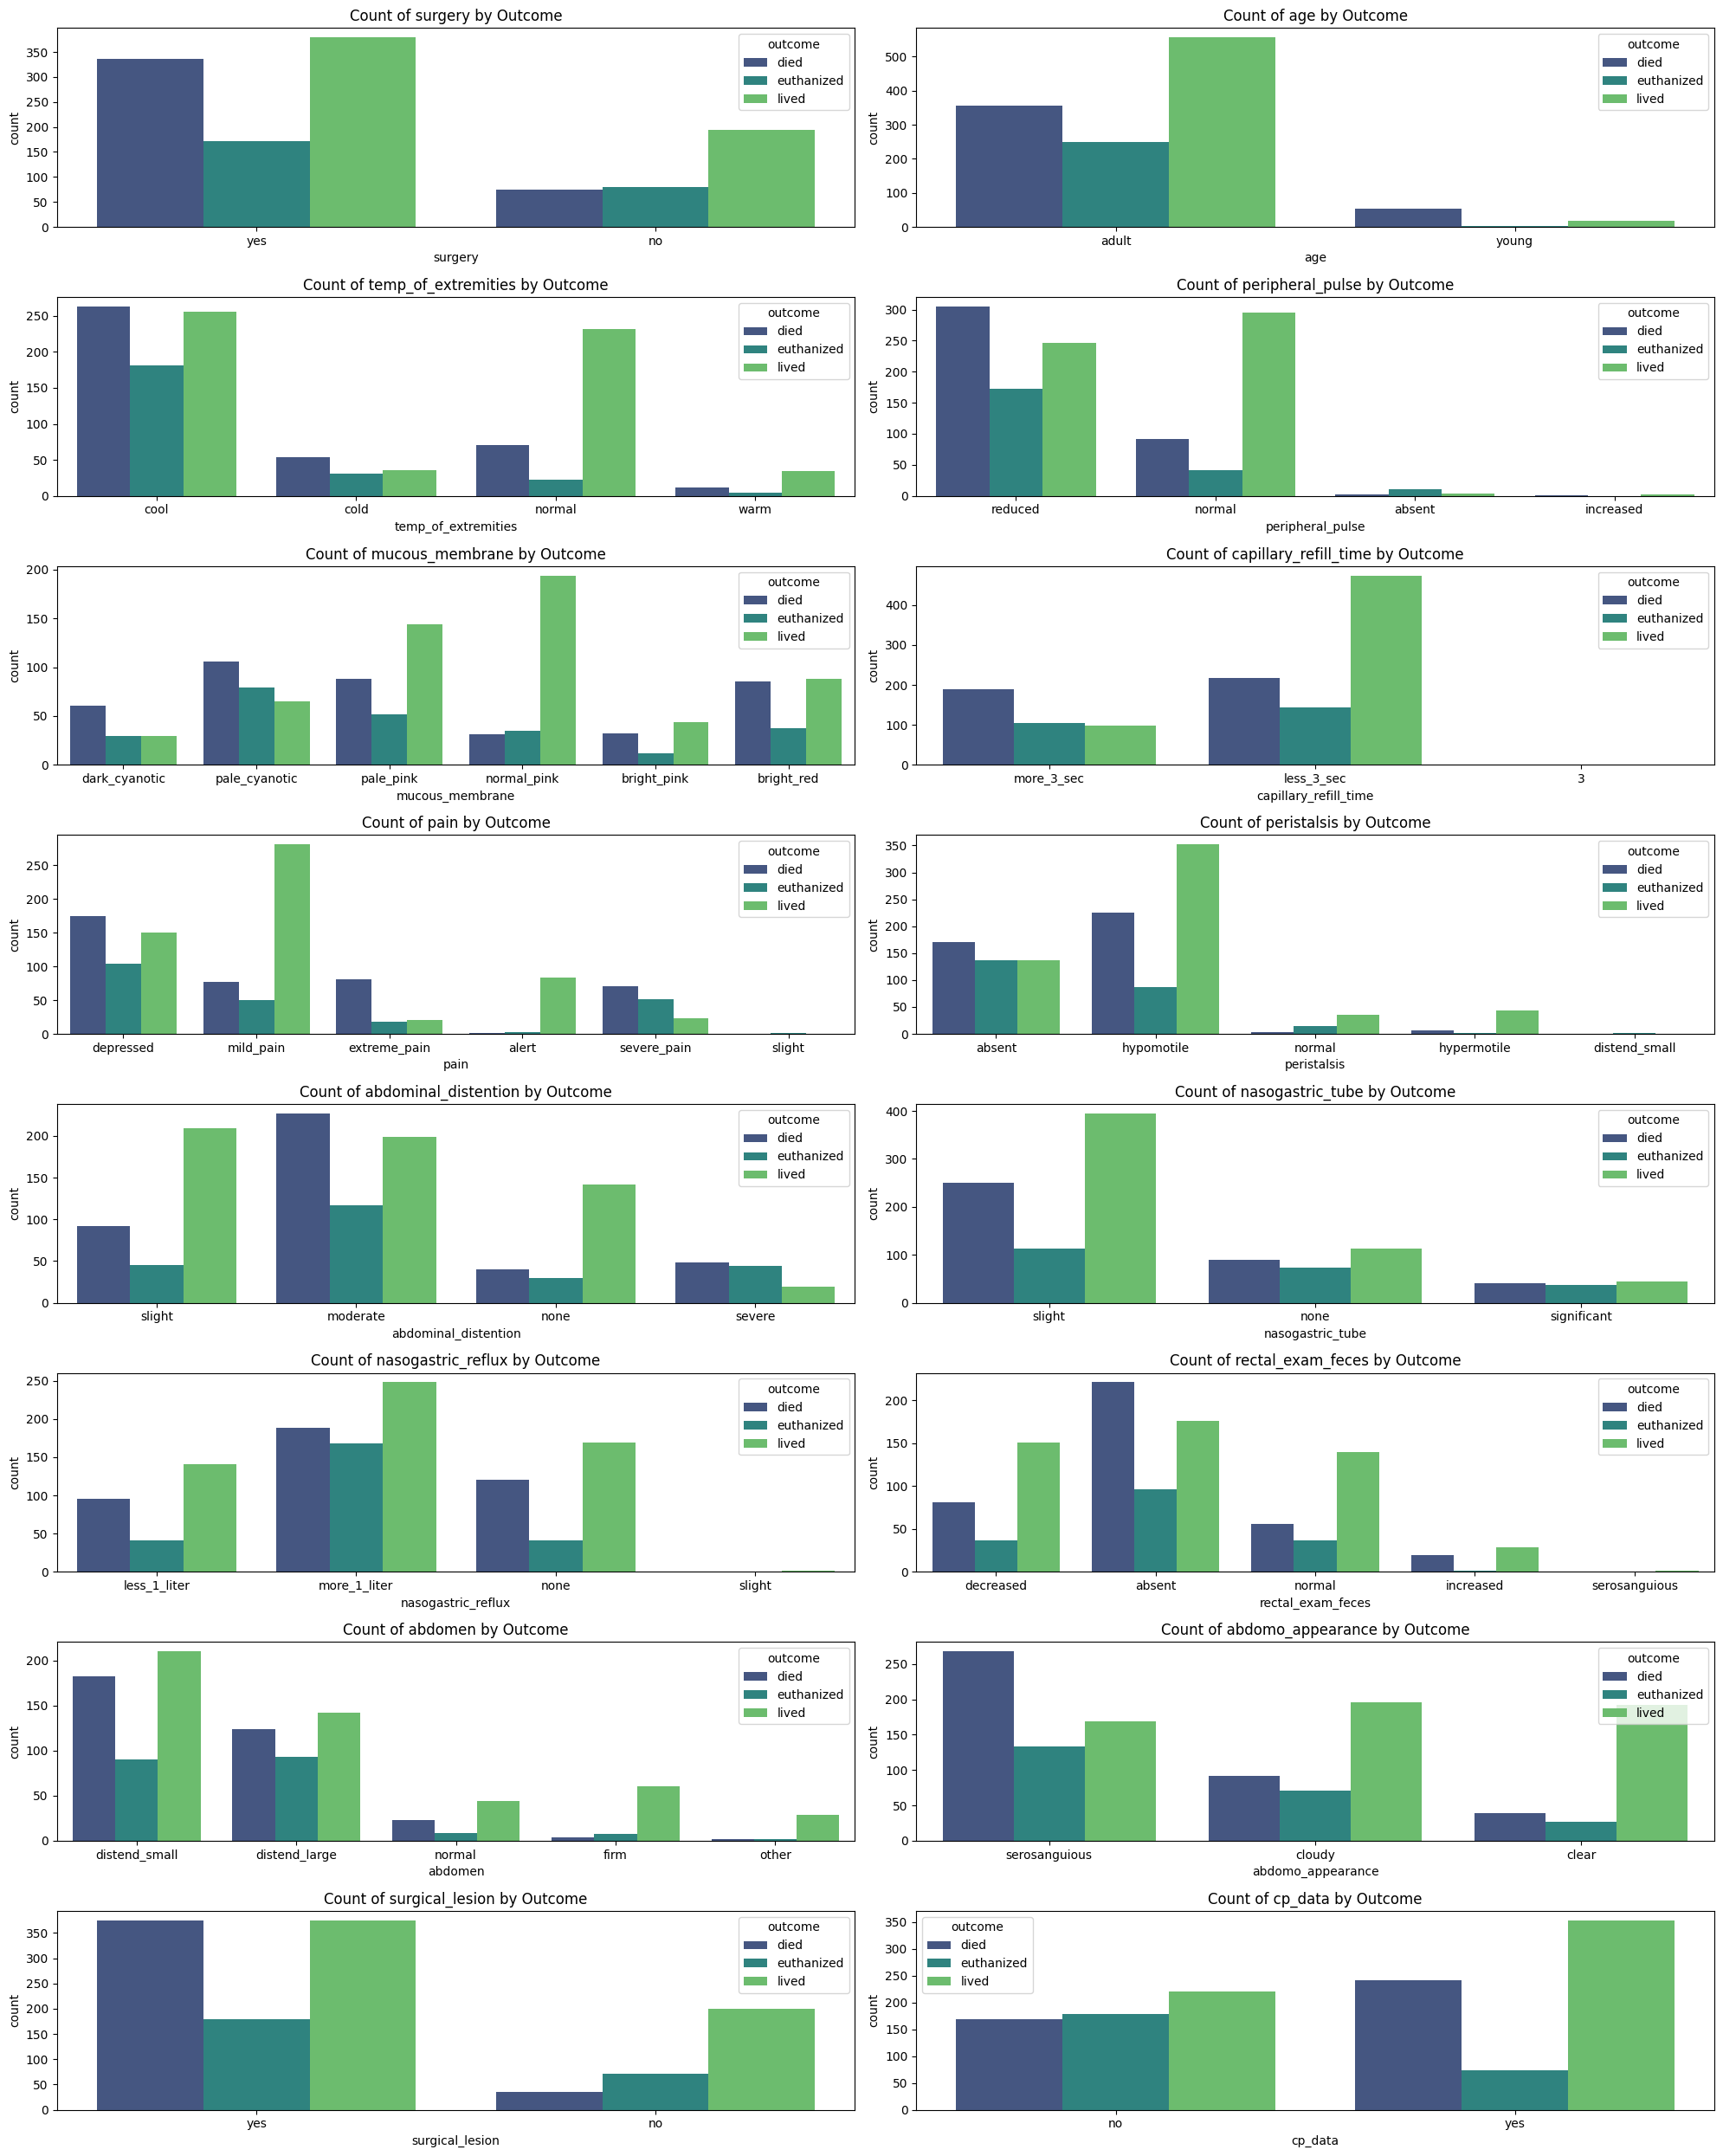

In [27]:
plt.figure(figsize=(20, 25))
num_categorical_features = len(rev_categorical_features)

# Iterate over categorical features and plot the countplot for each feature colored by the target variable 'outcome'
for i, col in enumerate(rev_categorical_features, 1):
    plt.subplot((num_categorical_features + 1) // 2, 2, i)
    sns.countplot(data=train_data, x=col, hue='outcome', palette='viridis')
    plt.title(f'Count of {col} by Outcome')
    #plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

The count plots above depict the distribution of each categorical feature, differentiated by the levels of the target variable outcome.

### Chi-Square Test of Independence

For each categorical feature, we can set up the null hypothesis ( ***H<sub>0</sub>***) and the alternative hypothesis (***H<sub>1</sub>***) as follows:

* Null Hypothesis (***H<sub>0</sub>***): There is no association between the categorical feature and the target variable outcome.
* Alternative Hypothesis (***H<sub>1</sub>***): There is a significant association between the categorical feature and the target variable outcome.

If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis, indicating that there is a significant association between the categorical feature and the target variable.

In [28]:
# Initialize a dictionary to store the p-values from the Chi-Square tests
chi2_p_values = {}

# Perform Chi-Square Test of Independence for each categorical feature against the target variable 'outcome'
for col in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(train_data[col], train_data['outcome'])
    
    # Perform the Chi-Square test
    _, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Store the p-value in the dictionary
    chi2_p_values[col] = p_value

# Convert the dictionary to a sorted DataFrame for better readability
chi2_results_df = pd.DataFrame(list(chi2_p_values.items()), columns=['Feature', 'P-Value'])
chi2_results_df = chi2_results_df.sort_values(by='P-Value').reset_index(drop=True)
chi2_results_df

,Feature,P-Value
0,pain,1.741015e-61
1,abdomo_appearance,8.943336e-34
2,peripheral_pulse,2.077486e-30
3,mucous_membrane,5.238474e-30
4,hospital_number,1.672740e-29
5,temp_of_extremities,2.210637e-27
6,abdominal_distention,4.010443e-26
7,peristalsis,2.281871e-23
8,capillary_refill_time,2.560365e-23
9,surgical_lesion,2.574669e-20


The Chi-Square tests of independence have been performed, and the p-values are listed above for each categorical feature. The smaller the p-value, the stronger the evidence to reject the null hypothesis, indicating a significant association between the feature and the target variable outcome

**Observations:**
* Features like pain, abdomo_appearance, peripheral_pulse, and abdominal_distention have extremely low p-values, indicating a very strong association with the target variable outcome.
* All the categorical features have a p-value less than 0.05, suggesting that they all have some level of association with the target variable.

## Discrete Features

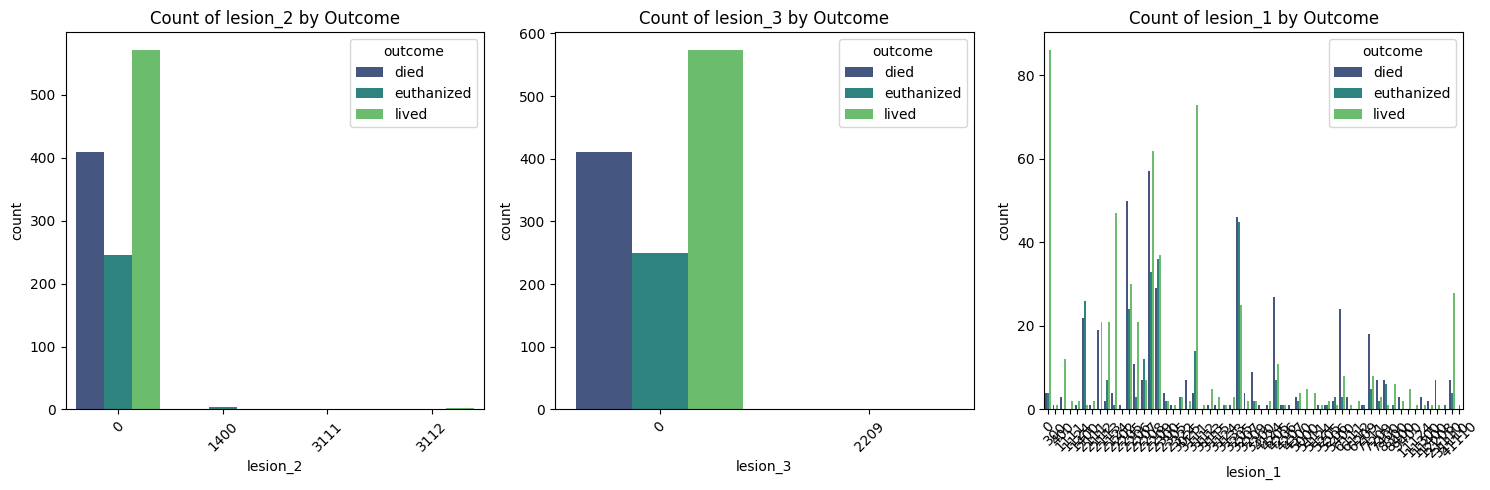

In [29]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))
num_discrete_features = len(discrete_features)

# Iterate over discrete features and plot the countplot for each feature colored by the target variable 'outcome'
for i, col in enumerate(discrete_features, 1):
    plt.subplot(1, num_discrete_features, i)
    sns.countplot(data=train_data, x=col, hue='outcome', palette='viridis')
    plt.title(f'Count of {col} by Outcome')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [30]:
site_mapping = {
    '1': 'gastric', '2': 'sm intestine', '3': 'lg colon', '4': 'lg colon and cecum', 
    '5': 'cecum', '6': 'transverse colon', '7': 'retum/descending colon', 
    '8': 'uterus', '9': 'bladder', '11': 'all intestinal sites','0': 'none'
}
type_mapping = {
    '1': 'simple', '2': 'strangulation', '3': 'inflammation', '4': 'other', '0': 'none'
}
subtype_mapping = {
    '1': 'mechanical', '2': 'paralytic', '0': 'none','3':'n/a'
}
specific_code_mapping = {
    '1': 'obturation', '2': 'intrinsic', '3': 'extrinsic', '4': 'adynamic', '5': 'volvulus/torsion',
    '6': 'intussuption', '7': 'thromboembolic', '8': 'hernia', '9': 'lipoma/slenic incarceration',
    '10': 'displacement', '0': 'none',
    '01': 'obturation', '02': 'intrinsic', '03': 'extrinsic', '04': 'adynamic', '05': 'volvulus/torsion',
    '06': 'intussuption', '07': 'thromboembolic', '08': 'hernia', '09': 'lipoma/slenic incarceration',
    '10': 'displacement', '00': 'none'
}

In [31]:
def explode_lesion(x):
    code = str(x)
    result = []
    if code == '0':
        result = ['0','0','0','0']
    elif len(code) == 2:
        result = [code[0],'0','0',code[1]]
    if len(code) == 3:
        result = [code[0], code[1], code[2], '0']

    elif len(code) == 4:
        result = [code[0], code[1], code[2], code[3]]

    elif len(code) == 5:
        if code[0:2] == '11':
            result = [code[0:2], code[2], code[3], code[4]]
        else:
            result = [code[0], code[1], code[2], code[3:]]
            
    result[0] = site_mapping[result[0]]
    result[1] = type_mapping[result[1]]
    result[2] = subtype_mapping[result[2]]
    result[3] = specific_code_mapping[result[3]]
    return result

In [32]:
train_data[['lesion_site', 'lesion_type', 'lesion_subtype', 'lesion_code']] = train_data.lesion_1.apply(explode_lesion).apply(pd.Series)

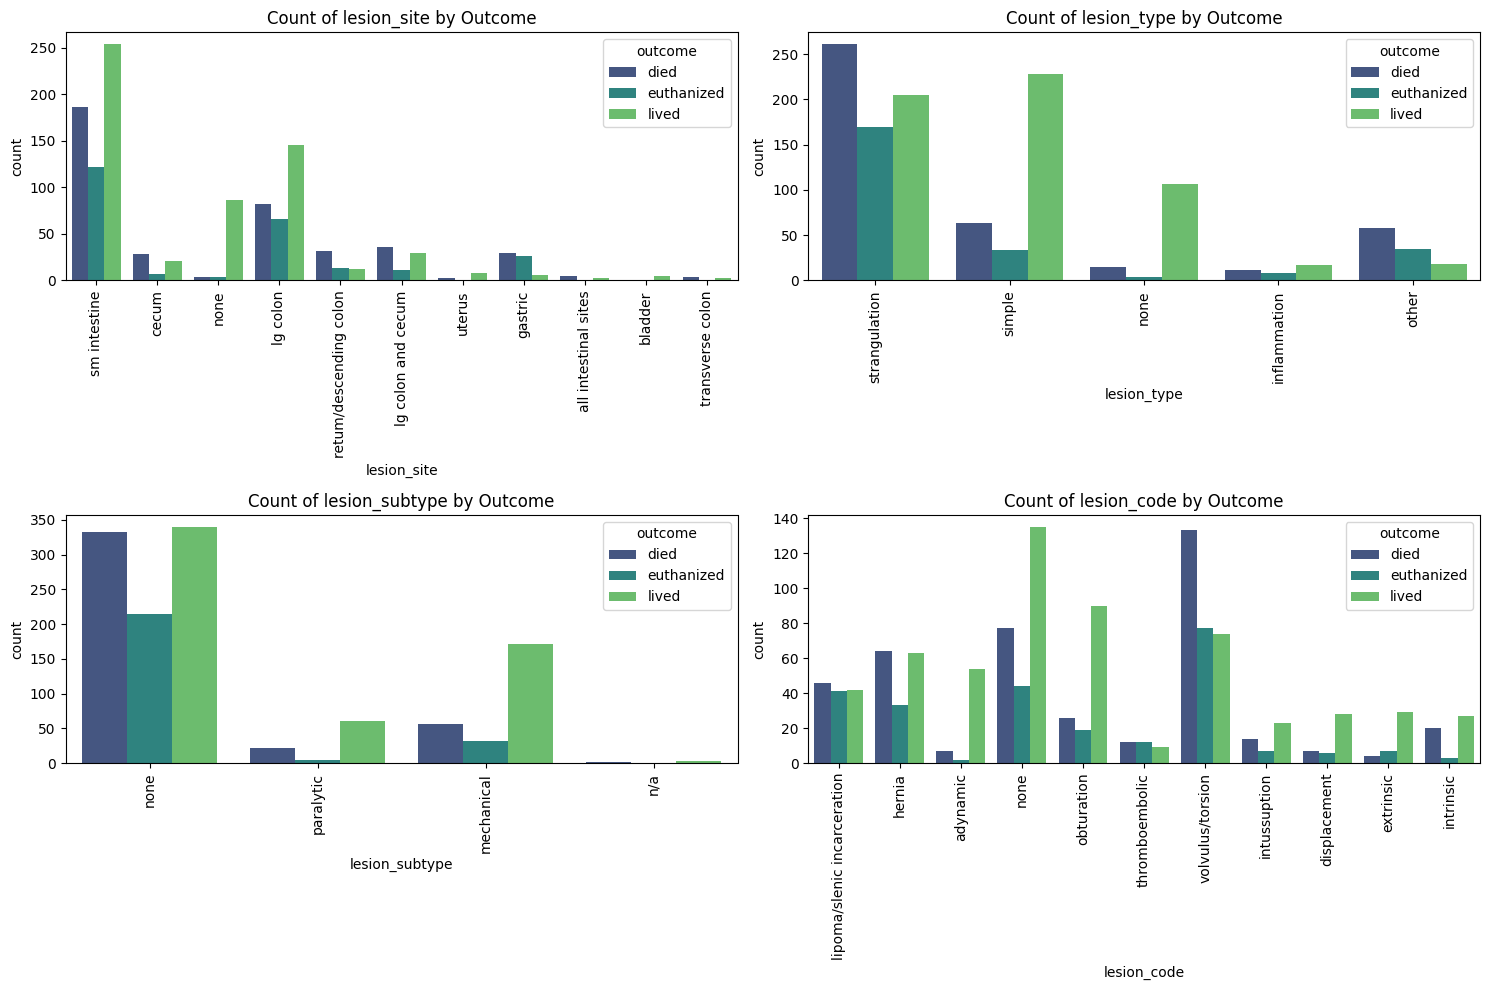

In [33]:
decomposed_features = [f'lesion_{component}' 
                       for component in ['site', 'type', 'subtype', 'code']]

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))
num_decomposed_features = len(decomposed_features)

# Iterate over decomposed features and plot the countplot for each feature colored by the target variable 'outcome'
for i, col in enumerate(decomposed_features, 1):
    plt.subplot((num_decomposed_features + 1) // 2, 2, i)
    sns.countplot(data=train_data, x=col, hue='outcome', palette='viridis')
    plt.title(f'Count of {col} by Outcome')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


## Continous Features

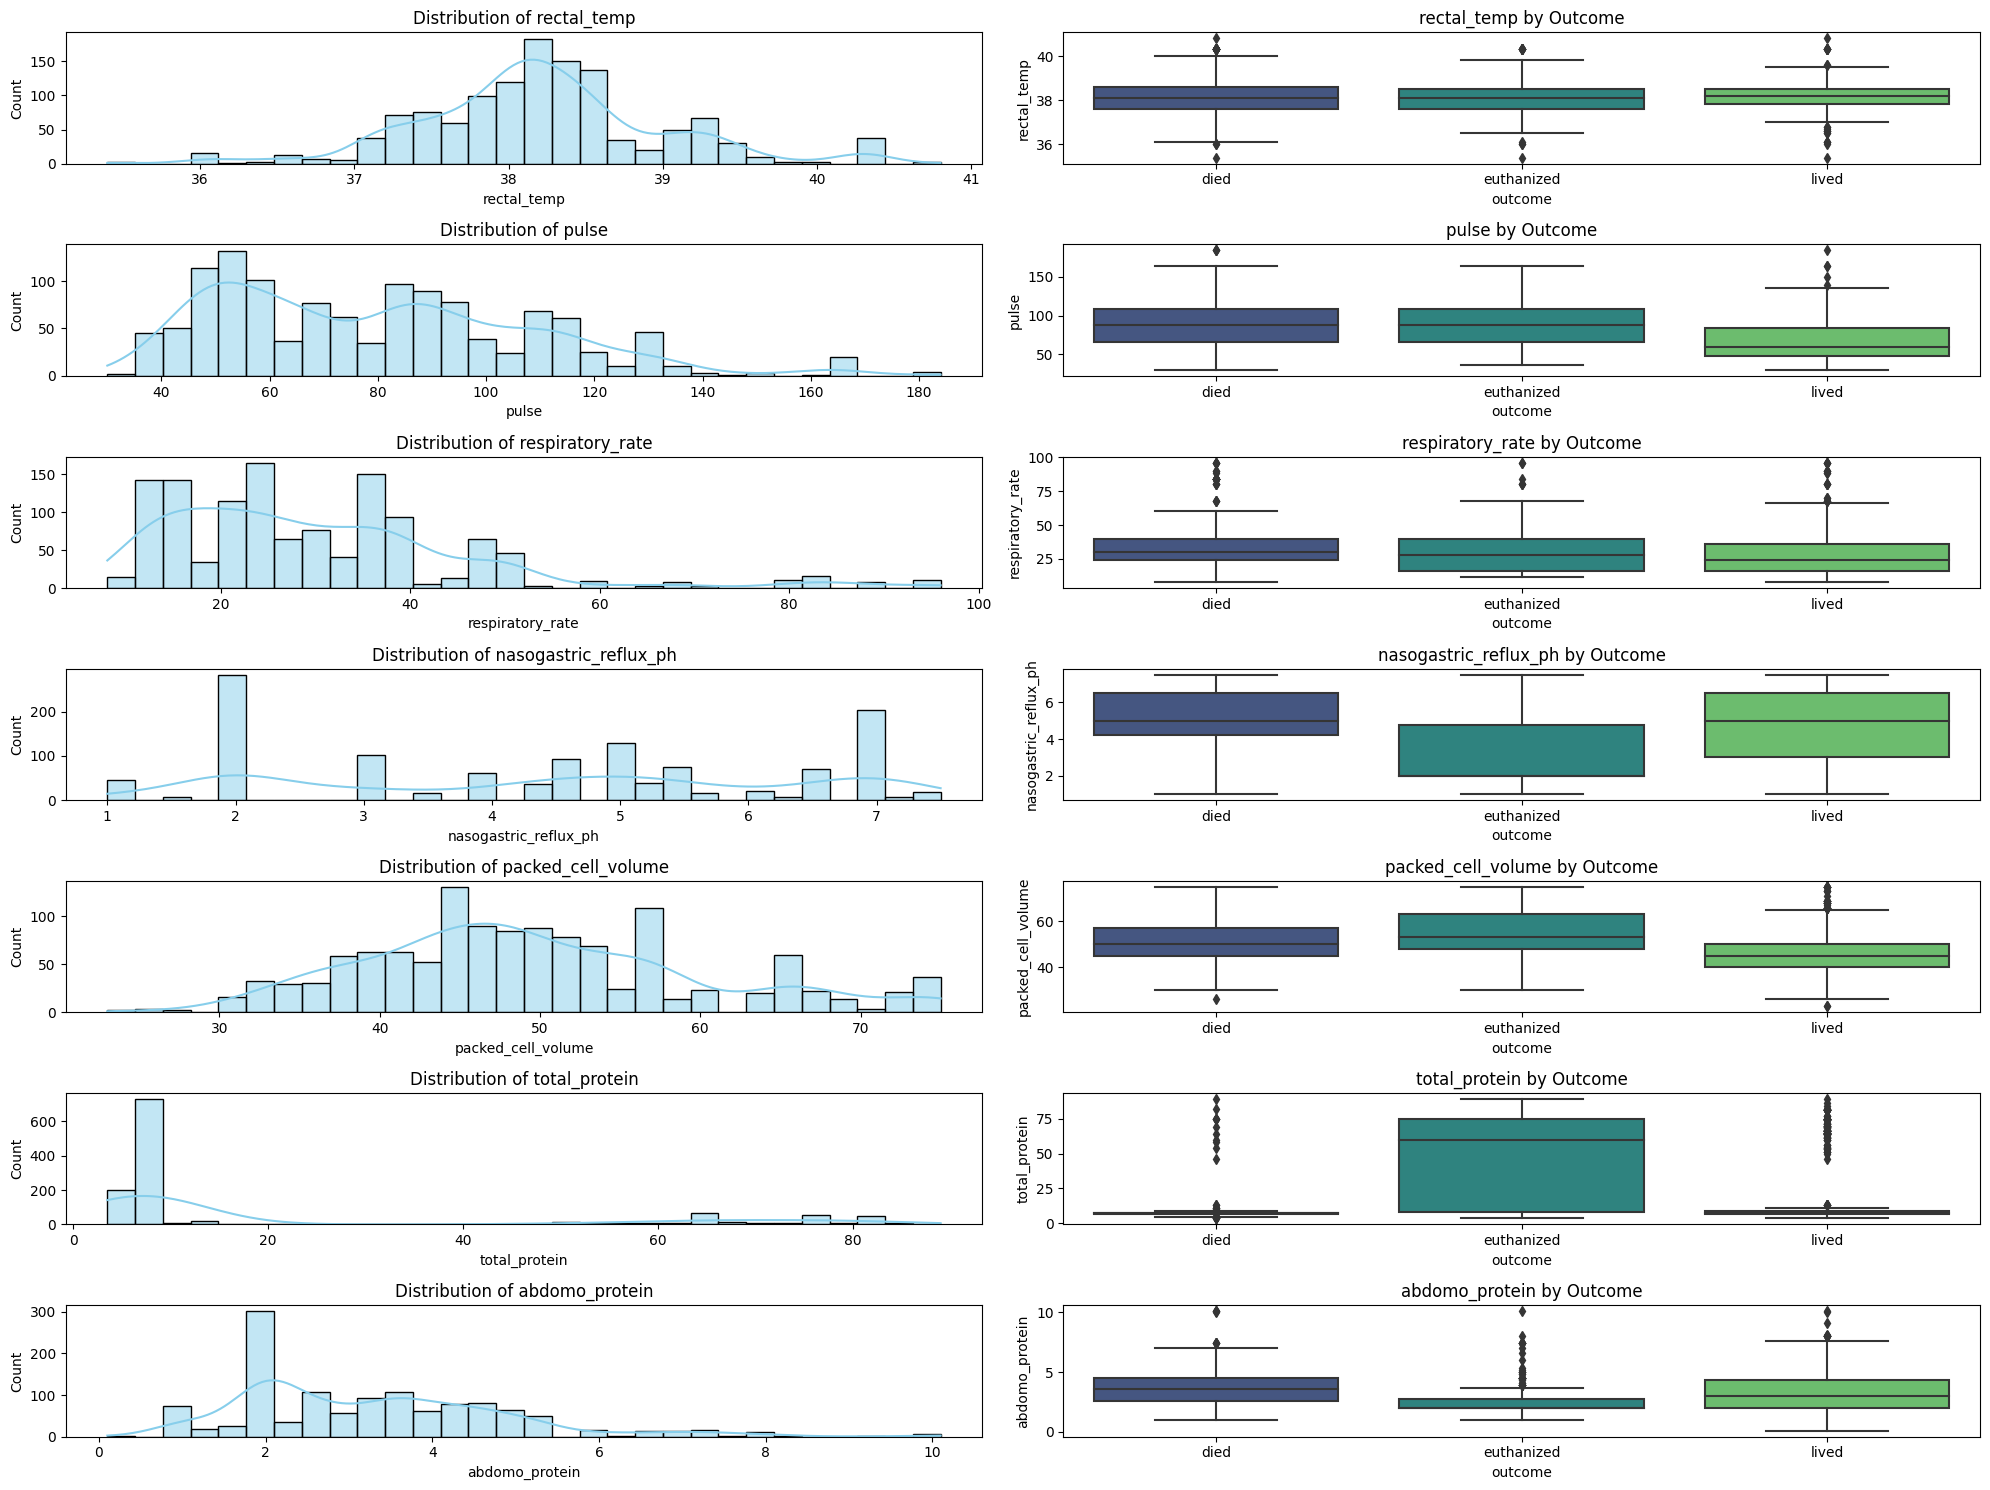

In [34]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))
num_continuous_features = len(continuous_features)

# Iterate over continuous features and plot the histogram and boxplot for each feature against the target variable 'outcome'
for i, col in enumerate(continuous_features, 1):
    plt.subplot(num_continuous_features, 2, 2 * i - 1)
    sns.histplot(train_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    
    plt.subplot(num_continuous_features, 2, 2 * i)
    sns.boxplot(x='outcome', y=col, data=train_data, palette='viridis')
    plt.title(f'{col} by Outcome')

plt.tight_layout()
plt.show()


**Observations:**
* Rectal Temperature (rectal_temp):

    - Appears to be normally distributed with a slight left skew.
    - Presence of outliers in each class, but more pronounced in the 'died' and 'euthanized' classes.

* Pulse (pulse):

    - Right-skewed distribution.
    - Variability in distributions among different outcomes, with 'died' and 'euthanized' classes having higher medians.
    - Presence of outliers in each class, especially in the 'lived' class.

* Respiratory Rate (respiratory_rate):

    - Highly right-skewed.
    - 'Died' class has higher medians and more pronounced outliers.

* Nasogastric Reflux PH (nasogastric_reflux_ph):

    - Seems to have a multimodal distribution.
    - Distributions vary across different outcomes.
    - Outliers are present in each class.

* Packed Cell Volume (packed_cell_volume):

    - Approximately normally distributed with slight right skewness.
    - Outliers are present, especially in the 'lived' class.

* Total Protein (total_protein):

    - Highly right-skewed.
    - Multiple outliers in each class, with 'euthanized' class having pronounced higher values.

* Abdomo Protein (abdomo_protein):

    - Right-skewed distribution.
    - Presence of outliers in each class.

#### ANOVA Test:
* Null Hypothesis(***H<sub>0</sub>***): There is no difference in the means of the groups (the means are equal).
* Alternative Hypothesis (***H<sub>1</sub>***): There is a difference between the means of the groups (at least one group mean is different from the others).

If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis, indicating that there is a significant difference between the means of the groups, suggesting a significant relationship between the continuous feature and the target variable.

In [35]:
def perform_ANOVA(train_data):
    # Initialize a dictionary to store the p-values from the ANOVA tests
    anova_p_values = {}

    # Perform ANOVA Test for each continuous feature against the target variable 'outcome'
    for col in continuous_features:
        # Extract the groups (levels of 'outcome') for the ANOVA test
        groups = [train_data[col][train_data['outcome'] == level] for level in train_data['outcome'].unique()]
        
        # Perform the ANOVA test
        _, p_value = f_oneway(*groups)
        
        # Store the p-value in the dictionary
        anova_p_values[col] = p_value

    # Convert the dictionary to a sorted DataFrame for better readability
    anova_results_df = pd.DataFrame(list(anova_p_values.items()), columns=['Feature', 'P-Value'])
    anova_results_df = anova_results_df.sort_values(by='P-Value').reset_index(drop=True)
    return anova_results_df

perform_ANOVA(train_data)

,Feature,P-Value
0,total_protein,4.233815e-68
1,nasogastric_reflux_ph,2.733604e-38
2,pulse,1.893047e-34
3,packed_cell_volume,3.916005e-28
4,abdomo_protein,1.594967e-18
5,respiratory_rate,4.350282e-10
6,rectal_temp,5.494829e-01


**Observations:**
*   Total Protein, Nasogastric Reflux pH, Pulse, Packed Cell Volume, Abdomo Protein, and Respiratory Rate:
    - These features have p-values much less than 0.05, suggesting that we can reject the null hypothesis. This implies that there is a significant difference in the means of these features across different levels of the target variable outcome.
    - Particularly, total_protein has an extremely low p-value, indicating a very strong relationship with the target variable.
    
* Rectal Temp:
    - This feature has a p-value greater than 0.05, suggesting that we fail to reject the null hypothesis. This implies that there is no significant difference in the means of rectal_temp across different levels of the target variable outcome.

In [36]:
outcome_classes = ['died','lived','euthanized']

In [37]:
def identify_outliers(data, feature, outcome_class):
    """
    Identify outliers in the given feature using the IQR method.
    """
    # Filter data for the specific outcome class
    feature_data = data[data['outcome'] == outcome_class][feature]
    
    # Calculate the first quartile (Q1) and the third quartile (Q3) of the feature data
    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = feature_data[(feature_data < lower_bound) | (feature_data > upper_bound)]
    
    return outliers

# Dictionary to store the outliers for each feature and each outcome class
outliers_dict = {}

# Identify outliers for each continuous feature within each outcome class
for outcome_class in outcome_classes:
    outliers_dict[outcome_class] = {}
    for feature in continuous_features:
        outliers_dict[outcome_class][feature] = identify_outliers(train_data, feature, outcome_class)

# Display the number of outliers identified for each feature and each outcome class
outliers_summary = {
    "Feature": [],
    "Outcome Class": [],
    "Number of Outliers": []
}
for outcome_class in outliers_dict:
    for feature in outliers_dict[outcome_class]:
        outliers_summary["Feature"].append(feature)
        outliers_summary["Outcome Class"].append(outcome_class)
        outliers_summary["Number of Outliers"].append(len(outliers_dict[outcome_class][feature]))

outliers_df = pd.DataFrame(outliers_summary)
outliers_df.pivot(index='Feature', columns='Outcome Class', values='Number of Outliers')


Outcome Class,died,euthanized,lived
Feature,,,
abdomo_protein,8,43,13
nasogastric_reflux_ph,0,0,0
packed_cell_volume,1,0,39
pulse,3,0,5
rectal_temp,26,12,23
respiratory_rate,28,6,18
total_protein,39,0,130


In [38]:
# Exploring the characteristics of outliers within each outcome class
outliers_characteristics = {
    "Outcome Class": [],
    "Feature": [],
    "Outliers Mean": [],
    "Outliers Median": [],
    "Non-Outliers Mean": [],
    "Non-Outliers Median": []
}

# Analyzing and summarizing the properties of the identified outliers within each outcome class
for outcome_class in outcome_classes:
    for feature in continuous_features:
        # Extracting the identified outliers and non-outliers within the specific outcome class and feature
        outlier_indices = outliers_dict[outcome_class][feature].index
        outliers = train_data.loc[outlier_indices, feature]
        non_outliers = train_data[(train_data['outcome'] == outcome_class) & (~train_data.index.isin(outlier_indices))][feature]
        
        # Summarizing the properties of outliers and non-outliers
        outliers_characteristics["Outcome Class"].append(outcome_class)
        outliers_characteristics["Feature"].append(feature)
        outliers_characteristics["Outliers Mean"].append(outliers.mean())
        outliers_characteristics["Outliers Median"].append(outliers.median())
        outliers_characteristics["Non-Outliers Mean"].append(non_outliers.mean())
        outliers_characteristics["Non-Outliers Median"].append(non_outliers.median())

# Convert the results to a DataFrame and display
outliers_characteristics_df = pd.DataFrame(outliers_characteristics)
outliers_characteristics_df

,Outcome Class,Feature,Outliers Mean,Outliers Median,Non-Outliers Mean,Non-Outliers Median
0,died,rectal_temp,39.800000,40.3,38.103646,38.1
1,died,pulse,184.000000,184.0,89.515971,88.0
2,died,respiratory_rate,84.142857,84.0,30.376963,30.0
3,died,nasogastric_reflux_ph,NaN,NaN,5.004634,5.0
4,died,packed_cell_volume,26.000000,26.0,51.547677,50.0
5,died,total_protein,25.202564,4.7,7.159030,7.2
6,died,abdomo_protein,8.737500,8.7,3.598010,3.6
7,lived,rectal_temp,38.039130,36.8,38.224319,38.2
8,lived,pulse,160.400000,164.0,68.114236,60.0
9,lived,respiratory_rate,83.000000,84.0,25.312950,24.0


In [39]:
# Dictionary to store the results of the t-tests and Levene's tests
stat_tests_results = {
    "Outcome Class": [],
    "Feature": [],
    "T-Test P-Value": [],
    "Levene's Test P-Value": []
}

# Perform t-tests and Levene's tests for features with and without outliers within each outcome class
for outcome_class in outcome_classes:
    for feature in continuous_features:
        # Extracting the identified outliers and non-outliers within the specific outcome class and feature
        outlier_indices = outliers_dict[outcome_class][feature].index
        outliers = train_data.loc[outlier_indices, feature].dropna()
        non_outliers = train_data[(train_data['outcome'] == outcome_class) & (~train_data.index.isin(outlier_indices))][feature].dropna()
        
        # Check if there are sufficient samples to perform the tests
        if len(outliers) < 2 or len(non_outliers) < 2:
            t_test_p_value = None
            levene_p_value = None
        else:
            # Perform t-test to compare means
            _, t_test_p_value = ttest_ind(outliers, non_outliers, equal_var=False)
            
            # Perform Levene's test to assess equality of variances
            _, levene_p_value = levene(outliers, non_outliers, center='median')
        
        # Append the results to the dictionary
        stat_tests_results["Outcome Class"].append(outcome_class)
        stat_tests_results["Feature"].append(feature)
        stat_tests_results["T-Test P-Value"].append(t_test_p_value)
        stat_tests_results["Levene's Test P-Value"].append(levene_p_value)

# Convert the results to a DataFrame and display
stat_tests_df = pd.DataFrame(stat_tests_results)
stat_tests_df


,Outcome Class,Feature,T-Test P-Value,Levene's Test P-Value
0,died,rectal_temp,4.255889e-06,6.713636e-01
1,died,pulse,1.235285e-221,3.698088e-02
2,died,respiratory_rate,6.572702e-30,1.813925e-04
3,died,nasogastric_reflux_ph,NaN,NaN
4,died,packed_cell_volume,NaN,NaN
5,died,total_protein,6.001844e-04,3.521510e-33
6,died,abdomo_protein,1.672052e-05,1.172201e-01
7,lived,rectal_temp,6.590555e-01,1.136892e-36
8,lived,pulse,2.012228e-04,3.819099e-01
9,lived,respiratory_rate,7.274955e-15,8.259590e-01


Here are the results of the ANOVA tests after applying the transformations, capping, and flooring, along with the visualizations of the distributions of the transformed continuous features:

### ANOVA Results:
- **Rectal Temperature (`rectal_temp`):**
   - P-Value with Outliers: \(0.574\)
   - P-Value without Outliers: \(0.0107\)
   - No significant change in p-values.

- **Pulse (`pulse`):**
   - P-Value with Outliers: \(3.79 \times 10^{-38}\)
   - P-Value without Outliers: \(2.95 \times 10^{-40}\)
   - Both p-values remain highly significant.

- **Respiratory Rate (`respiratory_rate`):**
   - P-Value with Outliers: \(4.47 \times 10^{-12}\)
   - P-Value without Outliers: \(2.03 \times 10^{-11}\)
   - Both p-values are significant, with a slight increase in significance when outliers are removed.

- **Nasogastric Reflux PH (`nasogastric_reflux_ph`):**
   - P-Value with Outliers: \(2.73 \times 10^{-38}\)
   - P-Value without Outliers: \(2.73 \times 10^{-38}\)
   - P-value remains the same and significant, as no outliers were identified for this feature.

- **Packed Cell Volume (`packed_cell_volume`):**
   - P-Value with Outliers: \(3.92 \times 10^{-28}\)
   - P-Value without Outliers: \(1.33 \times 10^{-46}\)
   - P-value decreases significantly when outliers are removed.

- **Total Protein (`total_protein`):**
   - P-Value with Outliers: \(9.63 \times 10^{-70}\)
   - P-Value without Outliers: \(5.02 \times 10^{-171}\)
   - P-value decreases significantly when outliers are removed.

- **Abdomo Protein (`abdomo_protein`):**
   - P-Value with Outliers: \(7.89 \times 10^{-24}\)
   - P-Value without Outliers: \(5.38 \times 10^{-49}\)
   - P-value decreases significantly when outliers are removed.

In [40]:
# Function to apply log transformation to a feature
def log_transform(feature_series):
    return feature_series.apply(lambda x: np.log1p(x) if x > 0 else 0)

# Function to apply square root transformation to a feature
def sqrt_transform(feature_series):
    return feature_series.apply(lambda x: np.sqrt(x) if x > 0 else 0)

# Function to cap and floor the outliers in a feature to the 1st and 99th percentiles respectively
def cap_and_floor(feature_series):
    lower_bound = feature_series.quantile(0.01)
    upper_bound = feature_series.quantile(0.99)
    return feature_series.clip(lower=lower_bound, upper=upper_bound)

# Dictionary to store the transformed data
transformed_data = train_data.copy()

# Apply transformations to the features with significantly different means and variances
transformed_data['pulse'] = log_transform(transformed_data['pulse'])
transformed_data['respiratory_rate'] = sqrt_transform(transformed_data['respiratory_rate'])
transformed_data['total_protein'] = log_transform(transformed_data['total_protein'])
transformed_data['abdomo_protein'] = sqrt_transform(transformed_data['abdomo_protein'])

# Apply capping and flooring or imputation to features with significantly different means but equal variances
transformed_data['rectal_temp'] = cap_and_floor(transformed_data['rectal_temp'])
transformed_data['abdomo_protein'] = cap_and_floor(transformed_data['abdomo_protein'])

# Reassess the distributions of the features after transformations
transformed_data[continuous_features].describe()


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,38.203482,4.325289,5.304245,4.382591,49.602429,2.579621,1.762193
std,0.779807,0.358358,1.385925,1.937357,10.535800,0.917773,0.417723
min,36.100000,3.433987,2.828427,1.000000,23.000000,1.504077,1.000000
25%,37.800000,3.988813,4.242641,2.000000,43.000000,2.028148,1.414214
50%,38.200000,4.343805,5.291503,4.500000,48.000000,2.140066,1.732051
75%,38.600000,4.615121,6.000000,6.000000,57.000000,2.312535,2.073644
max,40.300000,5.220356,9.797959,7.500000,75.000000,4.499810,2.828427


In [41]:
def perform_anova(data, feature, outcome_col):
    """
    Perform ANOVA test for a given feature across different outcome classes.
    """
    # List to store the feature values for each outcome class
    values_per_class = []
    
    # Extract the feature values for each outcome class and append to the list
    for outcome_class in data[outcome_col].unique():
        values_per_class.append(data[data[outcome_col] == outcome_class][feature].dropna())
    
    # Perform ANOVA test and return the p-value
    _, p_value = f_oneway(*values_per_class)
    return p_value

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Perform ANOVA tests again for each continuous feature with the transformed data
anova_results_transformed = {
    "Feature": [],
    "P-Value with Outliers": [],
    "P-Value without Outliers": []
}

# Perform ANOVA tests for each continuous feature with and without outliers on the transformed data
for feature in continuous_features:
    # Perform ANOVA test with outliers included
    p_value_with_outliers_transformed = perform_anova(transformed_data, feature, 'outcome')
    
    # Remove identified outliers and perform ANOVA test again
    data_without_outliers_transformed = transformed_data.copy()
    for outcome_class in outcome_classes:
        outlier_indices = outliers_dict[outcome_class][feature].index
        data_without_outliers_transformed.drop(outlier_indices, inplace=True)
    p_value_without_outliers_transformed = perform_anova(data_without_outliers_transformed, feature, 'outcome')
    
    # Append the results to the dictionary
    anova_results_transformed["Feature"].append(feature)
    anova_results_transformed["P-Value with Outliers"].append(p_value_with_outliers_transformed)
    anova_results_transformed["P-Value without Outliers"].append(p_value_without_outliers_transformed)

# Convert the results to a DataFrame and display
anova_df_transformed = pd.DataFrame(anova_results_transformed)
anova_df_transformed


,Feature,P-Value with Outliers,P-Value without Outliers
0,rectal_temp,5.738018e-01,1.068315e-02
1,pulse,3.786674e-38,2.947806e-40
2,respiratory_rate,4.470030e-12,2.027319e-11
3,nasogastric_reflux_ph,2.733604e-38,2.733604e-38
4,packed_cell_volume,3.916005e-28,1.327380e-46
5,total_protein,9.629365e-70,5.024998e-171
6,abdomo_protein,7.894469e-24,5.384984e-49


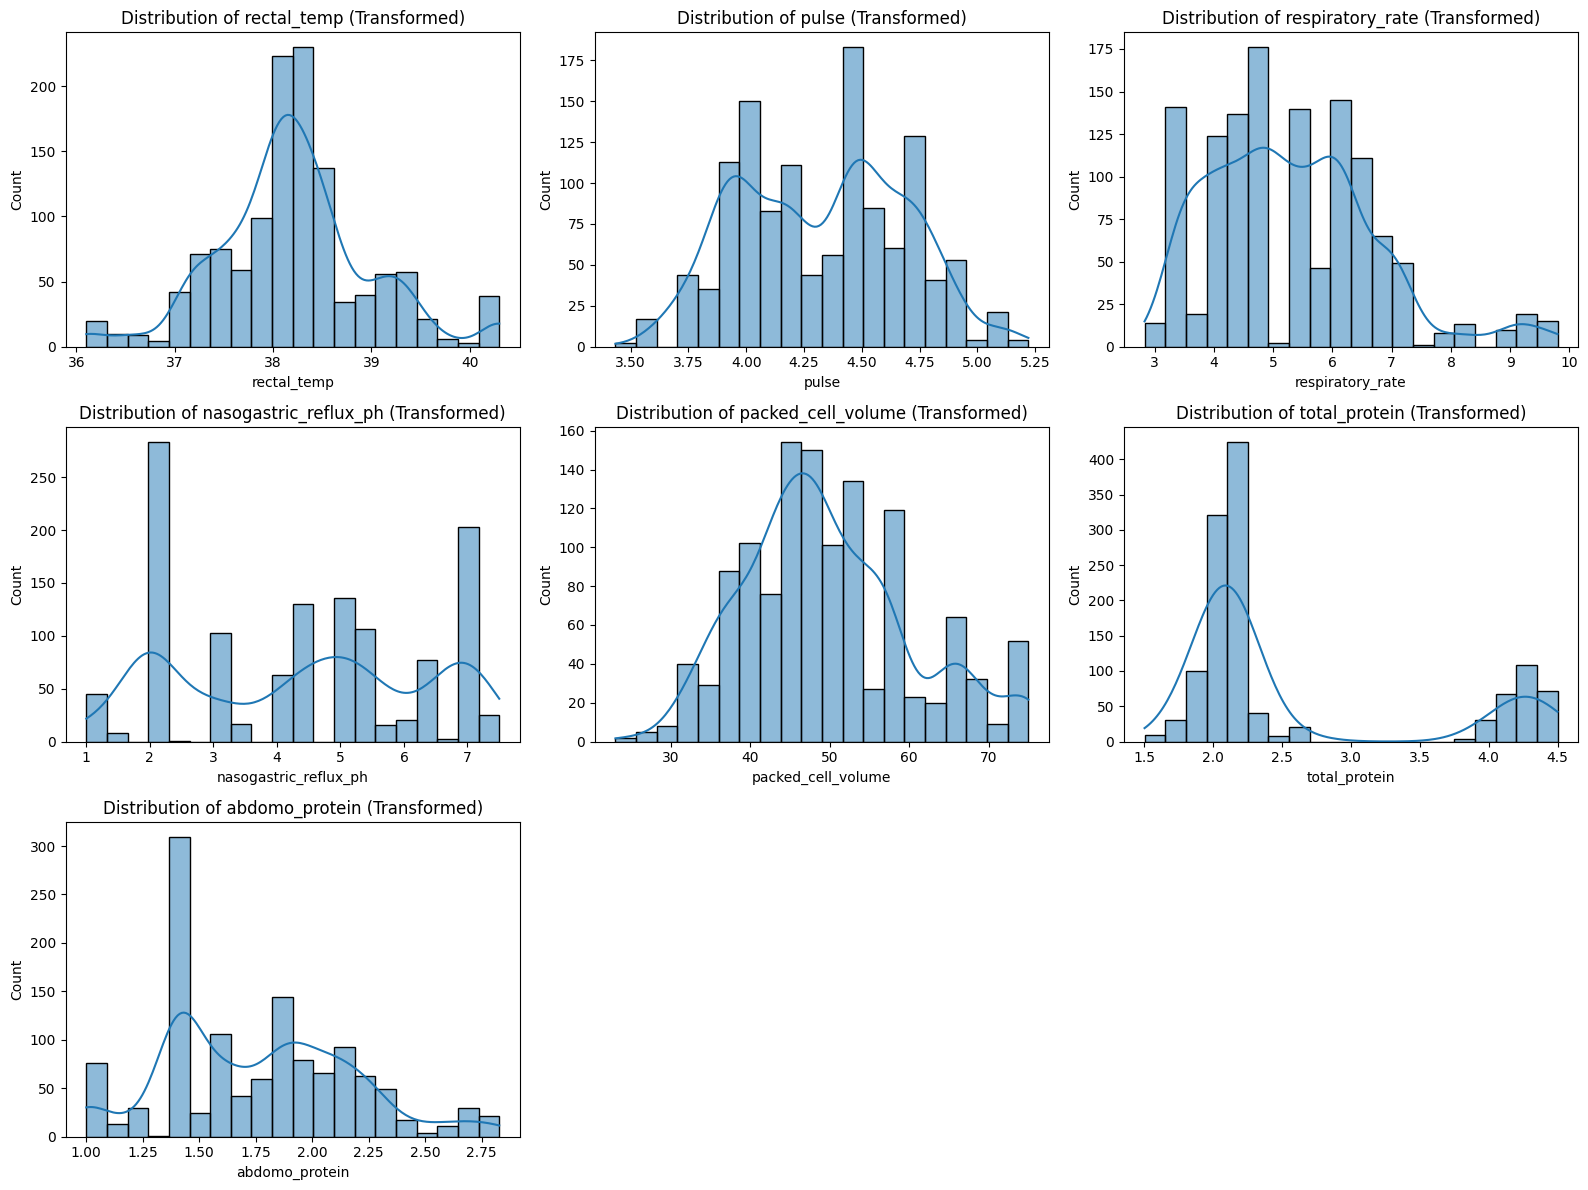

,Feature,P-Value with Outliers,P-Value without Outliers
0,rectal_temp,5.738018e-01,1.068315e-02
1,pulse,3.786674e-38,2.947806e-40
2,respiratory_rate,4.470030e-12,2.027319e-11
3,nasogastric_reflux_ph,2.733604e-38,2.733604e-38
4,packed_cell_volume,3.916005e-28,1.327380e-46
5,total_protein,9.629365e-70,5.024998e-171
6,abdomo_protein,7.894469e-24,5.384984e-49


In [43]:
# Visualize the distributions of the transformed features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(transformed_data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature} (Transformed)')
plt.tight_layout()
plt.show()

anova_df_transformed


* **Observation:**
    - The transformations have altered the skewness and distribution of the features.
    - The distributions appear to be more symmetric, indicating a reduction in skewness, especially for features like pulse and total_protein.

Certainly! Feature engineering is a crucial step to improve the model’s performance. Below are some of the general steps we can follow:

### 1. **Feature Creation:**
   - Create new features that might capture more information.
   - Combine two or more features to create meaningful interactions.

### 2. **Feature Transformation:**
   - Apply transformations like logarithmic, square root, or polynomial transformations to the features to capture non-linear relationships.

### 3. **Feature Scaling:**
   - Scale the features so that they are in the same range, especially important for distance-based algorithms like KNN and SVM.

### 4. **Feature Selection:**
   - Select the most important features that contribute to the model’s predictive power.
   - Use techniques like Recursive Feature Elimination, Feature Importance from Tree-based models, or LASSO regularization.

### 5. **Handling Imbalanced Data:**
   - If the dataset is imbalanced, consider techniques like oversampling the minority class, undersampling the majority class, or generating synthetic samples.

### Implementation Plan:
1. **Start with Feature Creation:**
   - Explore potential features that can be created from existing ones.
   - Examine the interactions between different features.

2. **Proceed with Feature Transformation and Scaling:**
   - Apply necessary transformations to the features.
   - Scale the features to bring them to the same range.

3. **Perform Feature Selection:**
   - Use various techniques to select the most relevant features for model training.

4. **Address Imbalanced Data:**
   - If applicable, use resampling techniques to balance the classes in the dataset.

Shall we start with feature creation by exploring potential new features and interactions among the existing ones? If you have specific features or interactions in mind that you would like to create, please let me know!